In [11]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.models.NBC_sklearn import NBC_sklearn
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [12]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "fcps"
dataset = "atom"
methods = ["NBC_TI", "NBC", "NBC_sklearn", "sklearn_kmeans"]
k = 20

## Loading benchmark dataset

In [13]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]

## Fetching precomputed clustering results

In [14]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [15]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 3.05 s
Wall time: 3.21 s


## NBC-TI

In [16]:
%%time
model = NBC_TI(k)
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 2.56 s
Wall time: 2.78 s


## NBC using sklearn.neighbors

In [17]:
%%time
model = NBC_sklearn(k)
results["NBC_sklearn"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 0 ns
Wall time: 16 ms


## Comparison

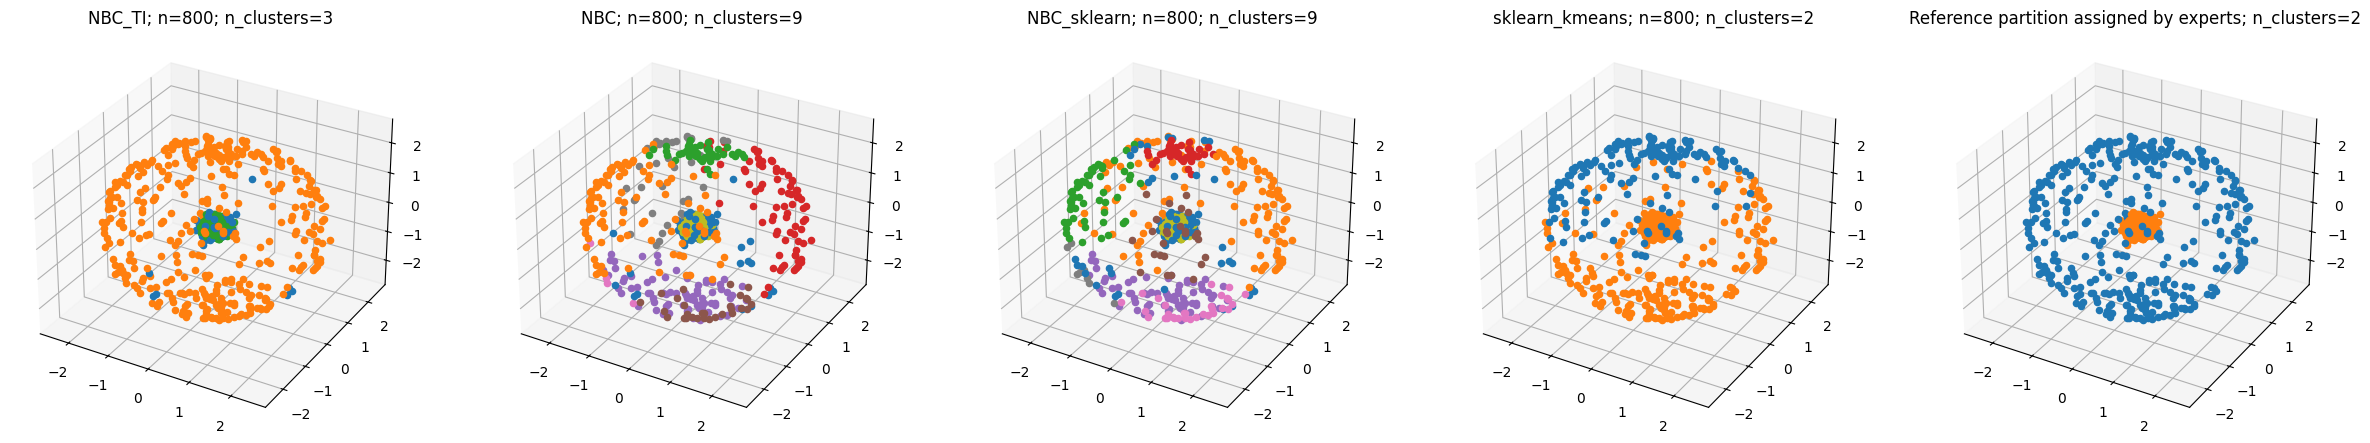

In [18]:
plot_results(benchmark.data, methods, results, reference)

In [19]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=20
╒═════════════════╤═════════════════════════════════════════╤═════════════════════════════════════════╤════════════════╕
│ NBC_TI          │ NBC                                     │ NBC_sklearn                             │ sklearn_kmeans │
│ [[  7 393   0]  │ [[ 16 102  47  80  80  29   4  42   0]  │ [[ 32 133  56  41  73  26  31   8   0]  │ [[171 229]     │
│  [ 33   0 367]] │  [ 46   0   0   0   0   0   0   0 354]] │  [ 57   0   0   0   0   0   0   0 343]] │  [  0 400]]    │
╘═════════════════╧═════════════════════════════════════════╧═════════════════════════════════════════╧════════════════╛


In [20]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=20
╒═══════════════════════════╤════════════════════════════╤════════════════════════════╤═══════════════════════════╕
│ NBC_TI                    │ NBC                        │ NBC_sklearn                │ sklearn_kmeans            │
│ ar: 0.9055397160995163    │ ar: 0.48105130811116986    │ ar: 0.46088382274854445    │ ar: 0.18206807775637832   │
│ r: 0.9527753441802252     │ r: 0.7406914893617021      │ r: 0.730616395494368       │ r: 0.5908667083854819     │
│ fm: 0.9515432923034881    │ fm: 0.6933804778014021     │ fm: 0.6788430089556425     │ fm: 0.654708512069173     │
│ afm: 0.9075369138665786   │ afm: 0.5286066852253563    │ afm: 0.5080277350228611    │ afm: 0.18640385448097174  │
│ mi: 0.6699608585689748    │ mi: 0.6488929204618693     │ mi: 0.6204832233724455     │ mi: 0.17758417705061602   │
│ nmi: 0.8646908810130702   │ nmi: 0.5311756403952088    │ nmi: 0.5087801638264582    │ nmi: 0.2930359134844313   │
│ ami: 0.8644705951248998   │ ami: 0.5291801517475356    │